## NBA Draft 2018 Prediction -- NBA 选秀2018预测

##### Performance data:  
FGM, FGA, FG%: field goals made, attempted and percentage  
3PM, 3PA, 3P%: 3 points made, attempted and percentage  
FTM, FTA, FT%: free throws made, attempted and percentage  
TOV, PF: turnovers, personal fouls  
ORB, DRB, ORB%, DRB%: offensive, defensive rebounds and percentage  
RPG, APG, SPG, BPG, PPG: statistic per game, rebounds, assists, steals, blocks, points  
TS: true shooting percentage  
eFG%: effective field goal percentage  
AST%, TOV%, STL%, BLK%, USG%: percentages of, assist, turnover, steal, block, usage(of team play)  
ORtg, DRtg: offensive, defensive rating  
eDiff: the difference between a team or player's ORtg and DRtg  
PPS, PPR: points per Shot and pure point rating  
  
##### Profile data:  
Pos, Weight, Age, Agility, Shuttle Run, Sprint, Standing Vertical,  
Max Vertical Leap, Max Bench Press, Body Fat Percentage,  
Hand Length, Hand Width, Heightw/oshoesinches,  
Heightw/shoesinches, Standing_Reach_inches, Wingspan_inches  
  
##### Target:  
WS (Win Shares): an estimate of the total number of wins a player produces.  

#### Package import 

In [1]:
import pandas as pd
import seaborn as sns
import sklearn.model_selection as model_selection
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn import linear_model
from sklearn.model_selection import train_test_split ## training-validation-test data split
import numpy as np
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn import metrics
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import cross_validate ## for cross validation

#### Data loading 

In [2]:
data = pd.read_csv('all_college_data.csv', na_values = '-')

In [3]:
data.head()

,Player,Team_x,GP,MPG,FGM,FGA,FG%,3PM,3PA,3P%,...,Standing Vertical,Max Vertical Leap,Max Bench Press,Body Fat Percentage,Hand Length,Hand Width,Heightw/oshoesinches,Heightw/shoesinches,Standing_Reach_inches,Wingspan_inches
0,Andre Roberson,CU,36,30.2,4.1,8.1,0.510,0.5,1.4,0.380,...,30.0,36.5,10.0,0.0705,8.75,9.50,78.25,79.00,104.5,83.0
1,Lavoy Allen,TEM,33,33.9,4.7,9.7,0.480,0.2,0.5,0.294,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Vernon Macklin,UF,37,24.5,5.2,8.7,0.593,0.0,0.0,0.000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Ryan Kelly,DUKE,31,25.9,3.5,7.8,0.444,1.3,3.2,0.408,...,NaN,NaN,NaN,0.1475,9.00,10.00,81.75,83.75,110.0,83.5
4,Michael Kidd-Gilchrist,UK,40,31.1,4.0,8.2,0.491,0.3,1.3,0.255,...,32.0,35.5,6.0,0.0700,9.00,10.25,77.75,79.50,104.5,84.0


#### Data description

In [4]:
data.shape

(417, 60)

In [5]:
data.describe()

,GP,MPG,FGM,FGA,FG%,3PM,3PA,3P%,FTM,FTA,...,Standing Vertical,Max Vertical Leap,Max Bench Press,Body Fat Percentage,Hand Length,Hand Width,Heightw/oshoesinches,Heightw/shoesinches,Standing_Reach_inches,Wingspan_inches
count,417.000000,417.000000,417.000000,417.000000,417.000000,417.000000,417.000000,417.000000,417.000000,417.000000,...,325.000000,324.000000,318.000000,319.000000,157.000000,157.000000,348.000000,325.000000,348.000000,349.000000
mean,33.784173,31.935971,5.804892,11.845156,0.496564,1.150671,3.084748,0.315410,3.774724,5.101127,...,29.676923,34.833333,11.320755,0.071210,8.789809,9.528662,77.623563,78.946154,103.576868,82.503152
std,3.109607,3.577890,1.266687,2.861556,0.060827,0.962203,2.426055,0.161675,1.404653,1.716333,...,2.802158,3.381108,5.201093,0.024991,0.480809,0.705387,3.322566,3.339893,4.871994,4.067597
min,22.000000,19.100000,2.620000,4.290000,0.356000,0.000000,0.000000,0.000000,0.760000,1.420000,...,22.500000,25.000000,0.000000,0.026000,7.500000,7.250000,67.750000,69.000000,89.500000,70.000000
25%,32.000000,30.200000,4.900000,9.850000,0.451000,0.200000,0.600000,0.284000,2.800000,3.900000,...,28.000000,32.500000,8.000000,0.054000,8.500000,9.000000,75.250000,76.750000,100.000000,79.750000
50%,34.000000,32.300000,5.800000,11.800000,0.483000,1.100000,3.000000,0.350000,3.600000,4.900000,...,30.000000,35.000000,11.000000,0.067000,8.750000,9.500000,78.000000,79.250000,104.000000,82.750000
75%,36.000000,34.300000,6.600000,13.600000,0.534000,1.900000,5.000000,0.399000,4.700000,6.200000,...,31.500000,37.000000,15.000000,0.080000,9.000000,10.000000,80.250000,81.500000,107.000000,85.500000
max,41.000000,38.900000,9.800000,21.800000,0.660000,3.900000,9.900000,1.000000,8.700000,11.200000,...,39.500000,44.000000,26.000000,0.208000,10.250000,11.500000,85.250000,86.500000,114.500000,91.000000


#### Data cleaning

In [6]:
data.isnull().sum()

Player                     0
Team_x                     0
GP                         0
MPG                        0
FGM                        0
FGA                        0
FG%                        0
3PM                        0
3PA                        0
3P%                        0
FTM                        0
FTA                        0
FT%                        0
TOV                        0
PF                         0
ORB                        0
DRB                        0
RPG                        0
APG                        0
SPG                        0
BPG                        0
PPG                        0
TS%                        8
eFG%                       8
Total S %                  8
ORB%                       8
DRB%                       8
TRB%                       8
AST%                       8
TOV%                       8
STL%                       8
BLK%                       8
USG%                       8
PPR                        8
PPS           

In [7]:
data[data.PER.isnull()]

,Player,Team_x,GP,MPG,FGM,FGA,FG%,3PM,3PA,3P%,...,Standing Vertical,Max Vertical Leap,Max Bench Press,Body Fat Percentage,Hand Length,Hand Width,Heightw/oshoesinches,Heightw/shoesinches,Standing_Reach_inches,Wingspan_inches
29,Malcolm Lee,UCLA,33,33.1,4.3,9.8,0.437,1.2,4.0,0.295,...,30.0,35.5,17.0,0.0590,8.5,9.5,76.00,77.50,101.5,81.75
33,Amir Johnson,RU,28,35.8,4.4,11.8,0.373,1.5,4.4,0.344,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
35,Taurean Green,UF,39,33.4,3.3,9.1,0.366,2.3,5.9,0.384,...,29.0,32.5,8.0,0.0460,NaN,NaN,71.00,72.75,96.0,74.25
42,Jordan Farmar,UCLA,37,30.4,4.6,11.4,0.410,1.7,5.1,0.333,...,33.5,42.0,11.0,0.0440,NaN,NaN,72.75,74.00,94.5,75.00
70,Archie Goodwin,UK,33,31.8,4.8,10.8,0.440,0.5,1.9,0.266,...,30.0,36.0,1.0,0.0455,8.5,9.0,75.75,77.25,102.0,81.50
119,Daniel Ewing,DUKE,33,34.5,5.5,12.8,0.427,2.1,6.0,0.347,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
122,Mike Taylor,ISU,26,32.2,5.0,13.6,0.365,2.3,6.7,0.345,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
126,Austin Rivers,DUKE,34,33.2,5.1,11.8,0.433,1.7,4.7,0.365,...,32.5,37.5,1.0,0.0620,8.5,10.0,75.50,77.00,96.5,79.25


![title](images/ivydata_logo.jpg) 

In [8]:
data = data.dropna(thresh=len(data)*0.9, axis=1) ## drop the columns, which has <90% non-null values
data = data.dropna(subset=['PER']) ## drop rows containing null values, accroding to this subset (of features) 

In [9]:
data.isnull().sum()

Player            0
Team_x            0
GP                0
MPG               0
FGM               0
FGA               0
FG%               0
3PM               0
3PA               0
3P%               0
FTM               0
FTA               0
FT%               0
TOV               0
PF                0
ORB               0
DRB               0
RPG               0
APG               0
SPG               0
BPG               0
PPG               0
TS%               0
eFG%              0
Total S %         0
ORB%              0
DRB%              0
TRB%              0
AST%              0
TOV%              0
STL%              0
BLK%              0
USG%              0
PPR               0
PPS               0
ORtg              0
DRtg              0
eDiff             0
FIC               0
PER               0
WS                0
WS/48             1
Pick              2
Pos               2
Weight            2
Age               2
Pre-Draft Team    2
dtype: int64

In [10]:
data.shape

(409, 47)

In [11]:
np.unique(data.Pos)[0]==np.unique(data.Pos)[1]

TypeError: '<' not supported between instances of 'float' and 'str'

In [12]:
data.Pos = data.Pos.fillna('nan')
data.Weight = data.Weight.fillna(data.Weight.mean())
data.Age = data.Age.fillna(data.Age.mean())
data.Pick = data.Pick.fillna(61) ## for non selected player
data['WS/48'] = data['WS/48'].fillna(data['WS/48'].mean())
data['Pre-Draft Team'] = data['Pre-Draft Team'].fillna('others')

In [13]:
data.isnull().sum()

Player            0
Team_x            0
GP                0
MPG               0
FGM               0
FGA               0
FG%               0
3PM               0
3PA               0
3P%               0
FTM               0
FTA               0
FT%               0
TOV               0
PF                0
ORB               0
DRB               0
RPG               0
APG               0
SPG               0
BPG               0
PPG               0
TS%               0
eFG%              0
Total S %         0
ORB%              0
DRB%              0
TRB%              0
AST%              0
TOV%              0
STL%              0
BLK%              0
USG%              0
PPR               0
PPS               0
ORtg              0
DRtg              0
eDiff             0
FIC               0
PER               0
WS                0
WS/48             0
Pick              0
Pos               0
Weight            0
Age               0
Pre-Draft Team    0
dtype: int64

In [14]:
data.shape

(409, 47)

#### Feature creation

In [15]:
data.Pos.head()

0      SG
1    PF/C
2       F
3      PF
4      SF
Name: Pos, dtype: object

In [16]:
l = data.Pos.str.split("/").tolist()

In [17]:
flat_list = [item for sublist in l for item in sublist] ## convert list of list to a list 
np.unique(flat_list)

array(['C', 'F', 'F-G', 'FC', 'G', 'G-F', 'GF', 'PF', 'PG', 'SF', 'SG',
       'nan'], dtype='<U3')

In [18]:
data = data.reset_index(drop=True)

In [19]:
data['Pos-C']=0.0
data['Pos-PF']=0.0
data['Pos-SF']=0.0
data['Pos-PG']=0.0
data['Pos-SG']=0.0
for i in range(len(data)):
    p = data.Pos.str.split("/")[i] ## p = ['PF', 'C']
    data.loc[i,'Pos-C'] = any(c in p for c in ('C','FC'))*1.0
    data.loc[i,'Pos-PF'] = any(c in p for c in ('GF','F-G','G-F','F','PF','FC'))*1.0
    data.loc[i,'Pos-SF'] = any(c in p for c in ('GF','F-G','G-F','F','SF','FC'))*1.0
    data.loc[i,'Pos-PG'] = any(c in p for c in ('GF','F-G','G-F','G','PG'))*1.0
    data.loc[i,'Pos-SG'] = any(c in p for c in ('GF','F-G','G-F','G','SG'))*1.0

In [20]:
data.head()

,Player,Team_x,GP,MPG,FGM,FGA,FG%,3PM,3PA,3P%,...,Pick,Pos,Weight,Age,Pre-Draft Team,Pos-C,Pos-PF,Pos-SF,Pos-PG,Pos-SG
0,Andre Roberson,CU,36,30.2,4.1,8.1,0.510,0.5,1.4,0.380,...,26.0,SG,210.0,21.0,Colorado,0.0,0.0,0.0,0.0,1.0
1,Lavoy Allen,TEM,33,33.9,4.7,9.7,0.480,0.2,0.5,0.294,...,50.0,PF/C,260.0,22.0,Temple,1.0,1.0,0.0,0.0,0.0
2,Vernon Macklin,UF,37,24.5,5.2,8.7,0.593,0.0,0.0,0.000,...,52.0,F,227.0,24.0,Florida,0.0,1.0,1.0,0.0,0.0
3,Ryan Kelly,DUKE,31,25.9,3.5,7.8,0.444,1.3,3.2,0.408,...,48.0,PF,230.0,22.0,Duke,0.0,1.0,0.0,0.0,0.0
4,Michael Kidd-Gilchrist,UK,40,31.1,4.0,8.2,0.491,0.3,1.3,0.255,...,2.0,SF,232.0,18.0,Kentucky,0.0,0.0,1.0,0.0,0.0


![title](images/ivydata_logo.jpg) 

#### Data visualization

##### Histogram -- density distribution

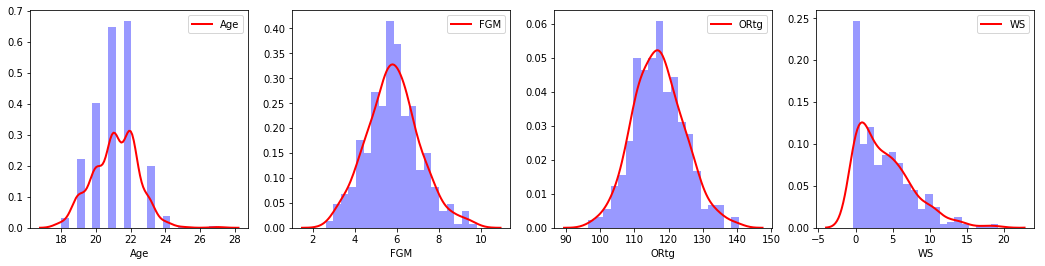

In [21]:
feature = ['Age', 'FGM', 'ORtg', 'WS']
index = 0
plt.figure(figsize=(18,4))
for fea in feature:
    index += 1
    plt.subplot(1,4, index)
    plt.xlabel(fea)
    sns.distplot(data[fea],kde=True,bins=20, color='b', kde_kws={"color": "r", "lw": 2, "label": fea})

#### Scatter plot -- features against target 

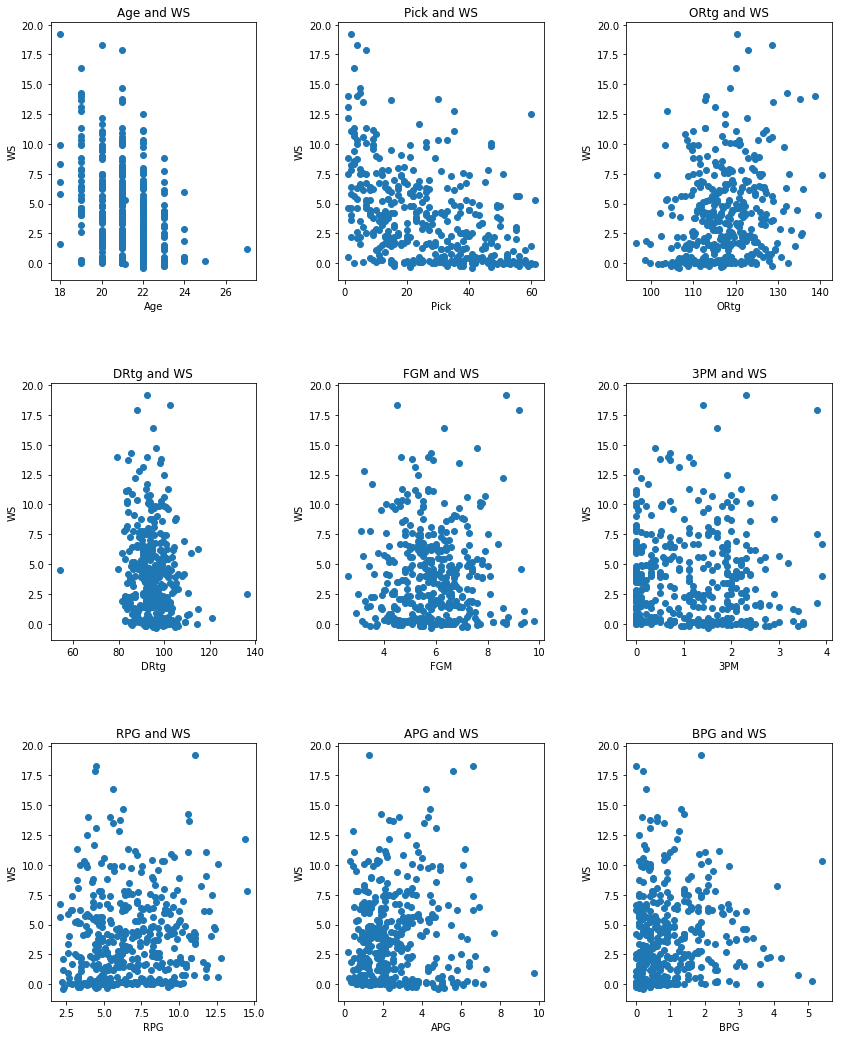

In [22]:
feature = ['Age','Pick','ORtg','DRtg','FGM','3PM','RPG','APG','BPG']
plt.figure()
fig, axes = plt.subplots(3,3, figsize =(14,18))
fig.subplots_adjust(wspace=.4, hspace=.4)
for i in range(9):
    row, col = i//3, i%3
    axes[row][col].scatter(data[feature[i]], data['WS'])
    axes[row][col].set_title(feature[i]+' and WS')
    axes[row][col].set_xlabel(feature[i])
    axes[row][col].set_ylabel('WS')
plt.show()

![title](images/ivydata_logo.jpg) 

#### Heatmap -- correlation among features

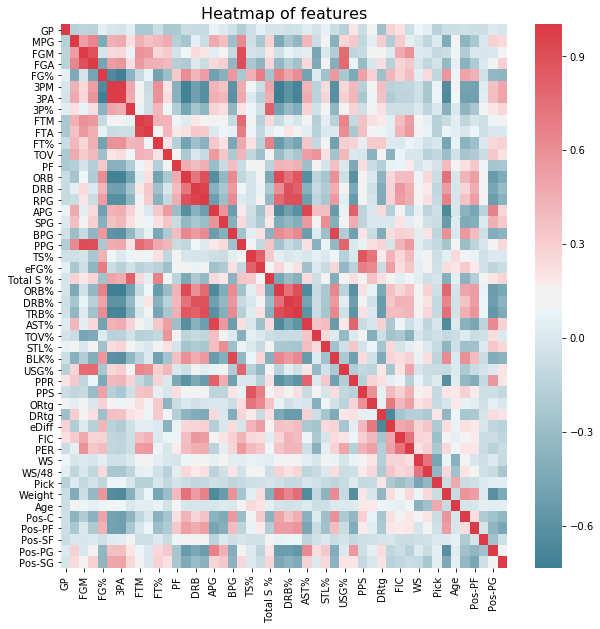

In [23]:
fig, ax = plt.subplots(figsize=(10,10))
plt.title("Heatmap of features",fontsize=16)
cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(data.corr(), cmap=cmap)
plt.show()

#### Model building 

##### Training-testing(validation) split and data normalization  

In [24]:
data.head()

,Player,Team_x,GP,MPG,FGM,FGA,FG%,3PM,3PA,3P%,...,Pick,Pos,Weight,Age,Pre-Draft Team,Pos-C,Pos-PF,Pos-SF,Pos-PG,Pos-SG
0,Andre Roberson,CU,36,30.2,4.1,8.1,0.510,0.5,1.4,0.380,...,26.0,SG,210.0,21.0,Colorado,0.0,0.0,0.0,0.0,1.0
1,Lavoy Allen,TEM,33,33.9,4.7,9.7,0.480,0.2,0.5,0.294,...,50.0,PF/C,260.0,22.0,Temple,1.0,1.0,0.0,0.0,0.0
2,Vernon Macklin,UF,37,24.5,5.2,8.7,0.593,0.0,0.0,0.000,...,52.0,F,227.0,24.0,Florida,0.0,1.0,1.0,0.0,0.0
3,Ryan Kelly,DUKE,31,25.9,3.5,7.8,0.444,1.3,3.2,0.408,...,48.0,PF,230.0,22.0,Duke,0.0,1.0,0.0,0.0,0.0
4,Michael Kidd-Gilchrist,UK,40,31.1,4.0,8.2,0.491,0.3,1.3,0.255,...,2.0,SF,232.0,18.0,Kentucky,0.0,0.0,1.0,0.0,0.0


![title](images/ivydata_logo.jpg) 

In [25]:
features = data.drop(['Player', 'Team_x', 'WS', 'WS/48', 'Pos', 'Pre-Draft Team', 'Pick', 
                     'FIC', 'PF', 'TOV', 'Total S %', 'eDiff'],1)
target = data['WS']

In [26]:
## here train-test split actually means train and validation split 
features_train, features_test, target_train, target_test = train_test_split(features, target, test_size = 0.3)

In [27]:
scaler = preprocessing.StandardScaler().fit(features_train)
scaler.transform(features_train)
scaler.transform(features_test)

array([[-0.93605833, -0.2754199 , -1.11939916, ..., -0.62858727,
        -0.54232614, -0.68864127],
       [ 0.0579244 , -3.19386012, -2.48683143, ..., -0.62858727,
        -0.54232614, -0.68864127],
       [ 1.05190714,  0.78077751, -0.27435675, ..., -0.62858727,
         1.84390889, -0.68864127],
       ...,
       [ 0.72057956,  1.30887622,  1.95348235, ..., -0.62858727,
        -0.54232614,  1.45213486],
       [ 0.0579244 , -0.49777725, -1.33450087, ..., -0.62858727,
         1.84390889, -0.68864127],
       [-1.26738591,  1.0587242 ,  0.03293141, ..., -0.62858727,
         1.84390889,  1.45213486]])

In [28]:
features_train.head()

,GP,MPG,FGM,FGA,FG%,3PM,3PA,3P%,FTM,FTA,...,ORtg,DRtg,PER,Weight,Age,Pos-C,Pos-PF,Pos-SF,Pos-PG,Pos-SG
356,31,31.9,9.4,19.5,0.480,3.0,7.9,0.376,4.5,5.5,...,117.3,102.1,31.8,205.0,22.0,0.0,0.0,0.0,0.0,1.0
148,33,32.2,6.4,12.3,0.516,0.8,2.3,0.333,2.8,4.8,...,111.9,85.2,25.5,210.0,23.0,0.0,1.0,1.0,1.0,1.0
357,33,31.5,9.3,17.5,0.532,1.1,2.9,0.379,6.5,8.5,...,124.8,86.2,37.2,235.0,19.0,0.0,1.0,1.0,0.0,0.0
247,36,31.4,5.8,11.6,0.504,3.3,6.6,0.504,3.4,3.7,...,129.4,114.9,23.8,186.0,22.0,0.0,0.0,0.0,1.0,1.0
111,32,30.7,5.9,10.3,0.571,0.3,0.7,0.409,3.2,4.6,...,125.7,90.1,28.3,228.0,22.0,0.0,1.0,0.0,0.0,0.0


#### Linear regression 

In [29]:
model_LR = LinearRegression()
model_LR.fit(features_train, target_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [30]:
model_LR.coef_

array([ 2.57014878e-02, -1.14232669e-01,  1.74443397e+00, -3.16574728e-01,
       -2.10972062e+01,  1.17725742e+00, -2.18086412e-01, -3.85642783e-01,
        9.71149192e-01, -3.54037908e-01, -8.24037143e+00, -4.38995502e+00,
       -5.00157252e+00,  5.15087345e+00, -1.18517191e+00,  1.73718627e+00,
       -1.94608235e+00, -2.16119869e-01, -1.33250250e+01, -6.08131827e-01,
       -8.70829880e-01, -8.37672832e-01,  1.62972542e+00,  2.54731770e-01,
        2.85079434e-01, -4.69521107e-01,  5.11411030e-01, -1.95973690e-01,
       -1.64441511e-01, -2.83542118e-01,  2.73709431e-01, -4.41183285e-02,
       -3.11615700e-02,  1.11554764e-02, -1.08808207e+00,  4.38344962e-02,
       -7.32052884e-01, -4.91388631e-01,  3.04115550e-02, -1.35956600e+00])

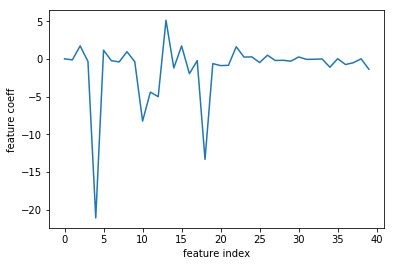

In [31]:
plt.plot(model_LR.coef_)
plt.xlabel('feature index')
plt.ylabel('feature coeff')
plt.show()

![title](images/ivydata_logo.jpg) 

#### Ridge regression

In [32]:
model_ridge = Ridge(alpha=1.0)
model_ridge.fit(features_train, target_train)

Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)

In [33]:
model_ridge.coef_

array([ 0.04164595, -0.10947997,  0.46723337,  0.49570096, -0.72496545,
        1.17027456, -0.13758779, -0.30498502,  0.2686325 ,  0.4328445 ,
       -0.96518358, -0.40444848, -0.97260314,  1.1224353 , -1.00063597,
        1.60112659, -1.76769431, -0.45394097, -0.5050816 , -0.47413609,
       -0.73584129, -0.77729183,  1.4614708 ,  0.21976643,  0.21844797,
       -0.42344643,  0.44216423, -0.22127034, -0.06437165, -1.62109475,
        0.17849174, -0.04233036,  0.02934969,  0.01269895, -1.12393557,
       -0.13429605, -0.63995787, -0.38819096, -0.01150023, -1.25430254])

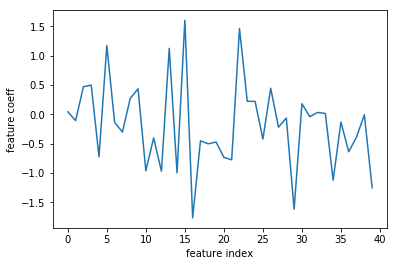

In [34]:
plt.plot(model_ridge.coef_)
plt.xlabel('feature index')
plt.ylabel('feature coeff')
plt.show()

![title](images/ivydata_logo.jpg) 

#### Lasso regression

In [35]:
model_lasso = linear_model.Lasso()
model_lasso.fit(features_train, target_train)

Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)

In [36]:
model_lasso.coef_

array([ 0.        , -0.        , -0.        , -0.        , -0.        ,
       -0.        , -0.        , -0.        ,  0.        ,  0.        ,
       -0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        , -0.        , -0.        , -0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.06238701,  0.        ,
        0.        ,  0.        , -0.        ,  0.        ,  0.        ,
        0.07661116, -0.0509697 ,  0.        ,  0.01812462, -0.31564643,
        0.        , -0.        , -0.        ,  0.        , -0.        ])

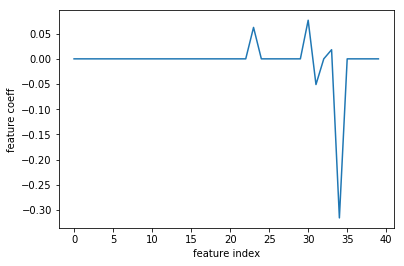

In [37]:
plt.plot(model_lasso.coef_)
plt.xlabel('feature index')
plt.ylabel('feature coeff')
plt.show()

![title](images/ivydata_logo.jpg) 

In [38]:
imp_features = features_train.columns.get_values()

In [39]:
imp_features

array(['GP', 'MPG', 'FGM', 'FGA', 'FG%', '3PM', '3PA', '3P%', 'FTM',
       'FTA', 'FT%', 'ORB', 'DRB', 'RPG', 'APG', 'SPG', 'BPG', 'PPG',
       'TS%', 'eFG%', 'ORB%', 'DRB%', 'TRB%', 'AST%', 'TOV%', 'STL%',
       'BLK%', 'USG%', 'PPR', 'PPS', 'ORtg', 'DRtg', 'PER', 'Weight',
       'Age', 'Pos-C', 'Pos-PF', 'Pos-SF', 'Pos-PG', 'Pos-SG'],
      dtype=object)

In [40]:
imp_features[~(model_lasso.coef_==0)]

array(['AST%', 'ORtg', 'DRtg', 'Weight', 'Age'], dtype=object)

#### Cross validation 

In [41]:
scores_LR1 = cross_validate(model_LR, features_test, target_test, cv=10, scoring='neg_mean_absolute_error', return_train_score=True)
scores_LR2 = cross_validate(model_LR, features_test, target_test, cv=10, scoring='neg_mean_squared_error', return_train_score=True)
print("Cross-Validation score for Linear Regression: ", np.mean(-1*scores_LR1['test_score']), np.sqrt(np.mean(-1*scores_LR2['test_score'])))

scores_ridge1 = cross_validate(model_ridge, features_test, target_test, cv=10, scoring='neg_mean_absolute_error', return_train_score=True)
scores_ridge2 = cross_validate(model_ridge, features_test, target_test, cv=10, scoring='neg_mean_squared_error', return_train_score=True)
print("Cross-Validation score for Ridge Regression: ", np.mean(-1*scores_ridge1['test_score']), np.sqrt(np.mean(-1*scores_ridge2['test_score'])))

scores_lasso1 = cross_validate(model_lasso, features_test, target_test, cv=10, scoring='neg_mean_absolute_error', return_train_score=True)
scores_lasso2 = cross_validate(model_lasso, features_test, target_test, cv=10, scoring='neg_mean_squared_error', return_train_score=True)
print("Cross-Validation score for Lasso Regression: ", np.mean(-1*scores_lasso1['test_score']), np.sqrt(np.mean(-1*scores_lasso2['test_score'])))

Cross-Validation score for Linear Regression:  3.6832256740019877 4.595300127757764
Cross-Validation score for Ridge Regression:  3.186511270800307 3.9664963358440724
Cross-Validation score for Lasso Regression:  2.9226989673243 3.5903143694863906


#### Make predictions 

In [56]:
prospects_df = pd.read_csv('2018_prospects.csv')

In [57]:
prospects_df.head()

,Player,Pos,Pre-Draft Team,GP,MPG,FGM,FGA,FG%,3PM,3PA,...,PPR,PPS,ORtg,DRtg,PER,Pick,Weight,Age,Heightw/shoesinches,Wingspan_inches
0,Deandre Ayton,C,Arizona,35,33.5,7.9,12.9,0.612,0.3,1.0,...,-2.7,1.6,130.3,97.5,30.6,1,250,19.6,85,89.0
1,Marvin Bagley III,PF/C,Duke,33,33.9,8.2,13.3,0.614,0.7,1.8,...,-3.7,1.6,128.1,97.5,28.3,2,225,18.9,83,84.5
2,Luka Doncic,PG,Real Madrid,49,24.7,4.7,10.4,0.456,1.5,4.9,...,4.2,1.5,124.2,106.2,25.4,3,220,19.0,80,NaN
3,Jaren Jackson Jr.,PF/C,Michigan State,35,21.8,3.4,6.6,0.513,1.1,2.7,...,-4.8,1.6,120.7,85.8,25.1,4,225,18.4,83,88.0
4,Mohamed Bamba,C,Texas,30,30.2,4.9,9.0,0.541,0.5,1.7,...,-4.2,1.4,118.4,88.4,26.4,5,216,19.8,85,93.0


![title](images/ivydata_logo.jpg) 

In [58]:
prospects_df['Wingspan_inches'] = prospects_df['Wingspan_inches'].fillna(prospects_df['Wingspan_inches'].mean())
prospects_df['PER'] = prospects_df['PER'].fillna(prospects_df['PER'].mean())

In [59]:
prospects_df.reset_index(drop=True)
prospects_df['Pos-C']=0.0
prospects_df['Pos-PF']=0.0
prospects_df['Pos-SF']=0.0
prospects_df['Pos-PG']=0.0
prospects_df['Pos-SG']=0.0
for i in range(len(prospects_df)):
    p = prospects_df.Pos.str.split("/")[i]
    prospects_df.loc[i,'Pos-C'] = any(c in p for c in ('C','FC'))*1.0
    prospects_df.loc[i,'Pos-PF'] = any(c in p for c in ('GF','F-G','G-F','F','PF'))*1.0
    prospects_df.loc[i,'Pos-SF'] = any(c in p for c in ('GF','F-G','G-F','F','SF'))*1.0
    prospects_df.loc[i,'Pos-PG'] = any(c in p for c in ('GF','F-G','G-F','G','PG'))*1.0
    prospects_df.loc[i,'Pos-SG'] = any(c in p for c in ('GF','F-G','G-F','G','SG'))*1.0

In [60]:
pro_features = prospects_df.drop(['Player', 'Pre-Draft Team', 'Pos', 'Pick', 
                                  'Heightw/shoesinches', 'Wingspan_inches'], 1)

In [61]:
pro_features.head()

,GP,MPG,FGM,FGA,FG%,3PM,3PA,3P%,FTM,FTA,...,ORtg,DRtg,PER,Weight,Age,Pos-C,Pos-PF,Pos-SF,Pos-PG,Pos-SG
0,35,33.5,7.9,12.9,0.612,0.3,1.0,0.343,4.0,5.5,...,130.3,97.5,30.6,250,19.6,1.0,0.0,0.0,0.0,0.0
1,33,33.9,8.2,13.3,0.614,0.7,1.8,0.397,4.0,6.3,...,128.1,97.5,28.3,225,18.9,1.0,1.0,0.0,0.0,0.0
2,49,24.7,4.7,10.4,0.456,1.5,4.9,0.304,4.1,5.1,...,124.2,106.2,25.4,220,19.0,0.0,0.0,0.0,1.0,0.0
3,35,21.8,3.4,6.6,0.513,1.1,2.7,0.396,3.0,3.8,...,120.7,85.8,25.1,225,18.4,1.0,1.0,0.0,0.0,0.0
4,30,30.2,4.9,9.0,0.541,0.5,1.7,0.275,2.7,4.0,...,118.4,88.4,26.4,216,19.8,1.0,0.0,0.0,0.0,0.0


In [62]:
scaler.transform(pro_features)

array([[ 0.38925198,  0.41944682,  1.56937216, ..., -0.62858727,
        -0.54232614, -0.68864127],
       [-0.27340318,  0.5306255 ,  1.79983827, ..., -0.62858727,
        -0.54232614, -0.68864127],
       [ 5.02783807, -2.02648403, -0.88893305, ..., -0.62858727,
         1.84390889, -0.68864127],
       ...,
       [ 0.72057956, -1.22043864, -0.5816449 , ..., -0.62858727,
        -0.54232614, -0.68864127],
       [ 1.38323471,  0.30826814, -0.81211101, ..., -0.62858727,
        -0.54232614,  1.45213486],
       [-0.93605833, -1.88751069, -1.96444158, ..., -0.62858727,
         1.84390889, -0.68864127]])

In [63]:
results = model_lasso.predict(pro_features)
prospects_df['WS'] = results
final = prospects_df[['Player', 'Pick', 'WS']]

In [64]:
final

,Player,Pick,WS
0,Deandre Ayton,1,5.297464
1,Marvin Bagley III,2,4.790698
2,Luka Doncic,3,5.373669
3,Jaren Jackson Jr.,4,5.027854
4,Mohamed Bamba,5,3.758495
5,Michael Porter Jr.,6,2.113791
6,Mikal Bridges,7,4.214438
7,Wendell Carter Jr.,8,5.674762
8,Collin Sexton,9,3.679169
9,Miles Bridges,10,4.455025


![title](images/ivydata_logo.jpg) 

In [65]:
final.sort_values(['WS'],ascending=[False]).iloc[0:60,]

,Player,Pick,WS
7,Wendell Carter Jr.,8,5.674762
2,Luka Doncic,3,5.373669
0,Deandre Ayton,1,5.297464
84,Gary Clark,61,5.202122
3,Jaren Jackson Jr.,4,5.027854
58,Jontay Porter,59,4.978687
1,Marvin Bagley III,2,4.790698
17,Zhaire Smith,18,4.648297
12,Trae Young,13,4.625797
93,Isaac Haas,61,4.615440


![title](images/ivydata_logo.jpg) 

In [67]:
ground = pd.read_csv('2018_NBA_Draft.csv')
ground = ground[['Player','Pick']]
perf = pd.merge(ground, final, how='left', on='Player')

FileNotFoundError: File b'2018_NBA_Draft.csv' does not exist

In [68]:
final_perf = perf.sort_values(['WS'], ascending=[False])

NameError: name 'perf' is not defined

In [69]:
final_perf

NameError: name 'final_perf' is not defined

In [55]:
plt.scatter(final_perf.Pick_x, final_perf.WS)
plt.xlabel('2018 NBA Draft pick')
plt.ylabel('Lasso model predicted WS')
plt.show()

NameError: name 'final_perf' is not defined

**Deandre Ayton 2018选秀状元  **
![image](images/2018R1_deandre-ayton.jpg)